In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import random
import time

In [4]:
#找到触电点之后的数据为训练数据
import os
def create_data(csv_id1,csv_id2):
    Data_train = []
    for i in range(csv_id1,csv_id2):
        data = get_valid_data(i)
        Data_train.extend(data)
    Data_train = np.array(Data_train)
    print('len_all_data =',len(Data_train))
    Data_train = Data_train.reshape(-1,4)
    return Data_train

def get_valid_data(csv_id):
    point_find_step = 1
    threshold = 1.0
    file_path = os.getcwd()+'\\plants\\'+str(csv_id)+'.csv'
    csv_data = pd.read_csv(open(file_path), usecols=[1,2,5,6],encoding='utf-8')   
    csv_data = np.array(csv_data)
    left, right = 0, len(csv_data) - 1
    while left < right:
        if abs(csv_data[left,1]) > threshold:
            break
        left = left + point_find_step
    while right > left:
        if abs(csv_data[right,1]) > threshold:
            break
        right = right - point_find_step
    data = csv_data[left:right+1]
    temp = data[0,0]
    data[:,0] = data[:,0] - temp
    data[:,0] = data[:,0]//100
    return data

#提取一个cvs中所有数据
def get_one_csv(cvs_id):
    file_path = os.getcwd()+'\\plants\\'+str(cvs_id)+'.csv'
    csv_data = pd.read_csv(open(file_path), usecols=[1,2,5,6])
    csv_data = np.array(csv_data)
    return csv_data

In [5]:
#输出，训练集大小，测试集大小，平均损失，训练时间
def evaluate(estimator, data_first, data_last, isNormalized = 0):
    print('csv'+str(data_first)+'---csv'+str(data_last-1))
    X = create_data(data_first, data_last)
    if isNormalized != 0: 
        #数据归一化处理,线性归一化
        X = (X - np.amin(X, axis=0))/(np.amax(X, axis=0)-np.amin(X, axis=0))
    X_train, X_test, y_train, y_test = train_test_split(X[:,[1,3]],X[:,2], test_size=0.25)
    time_start = time.clock()
    estimator.fit(X_train.reshape(-1,2),y_train)
    y_predict = estimator.predict(X_test.reshape(-1,2))
    time_end = time.clock()
    #计算平均损失
    cost = 5000*sum((y_predict - y_test)**2)/len(X_test)
    print('len_X_train =',len(X_train))
    print('len_X_test =',len(X_test))
    print('loss =',cost)
    print('score =',estimator.score(X_test, y_test))
    print('time cost = %s s'%(time_end-time_start))

def evaluate_by_time(estimator, data_first, data_last, isNormalized = 0):
    print('csv'+str(data_first)+'---csv'+str(data_last-1))
    X = create_data(data_first, data_last)
    if isNormalized != 0: 
        #数据归一化处理,线性归一化
        X = (X - np.amin(X, axis=0))/(np.amax(X, axis=0)-np.amin(X, axis=0))
    X_train, X_test, y_train, y_test = train_test_split(X[:,[0,1,3]],X[:,2], test_size=0.25)
    time_start = time.clock()
    estimator.fit(X_train.reshape(-1,3),y_train)
    y_predict = estimator.predict(X_test.reshape(-1,3))
    time_end = time.clock()
    #计算平均损失
    cost = 5000*sum((y_predict - y_test)**2)/len(X_test)
    print('len_X_train =',len(X_train))
    print('len_X_test =',len(X_test))
    print('loss =',cost)
    print('score =',estimator.score(X_test, y_test))
    print('time cost = %s s'%(time_end-time_start))
    
def test_one_csv(estimator, csv_id, isNormalized = 0):
    X = create_data(csv_id, csv_id+1)
    if isNormalized != 0: 
        #数据归一化处理,线性归一化
        X = (X - np.amin(X, axis=0))/(np.amax(X, axis=0)-np.amin(X, axis=0))
    y = estimator.predict(X[:,[1,3]])
    loss = 0.5*sum((y - X[:,2])**2)
    print('loss =',loss)
    plt.plot(X[:,0],X[:,2],label='Y')
    plt.plot(X[:,0],y,label='Y_predict')
    plt.legend()

def test_one_by_time(estimator, csv_id, isNormalized = 0):
    X = create_data(csv_id, csv_id+1)
    if isNormalized != 0: 
        #数据归一化处理,线性归一化
        X = (X - np.amin(X, axis=0))/(np.amax(X, axis=0)-np.amin(X, axis=0))
    y = estimator.predict(X[:,[0,1,3]])
    loss = 0.5*sum((y - X[:,2])**2)
    print('loss =',loss)
    plt.plot(X[:,0],X[:,2],label='Y')
    plt.plot(X[:,0],y,label='Y_predict')
    plt.legend()

In [6]:
data_id = random.randint(66,75)
print(data_id)

73


csv1---csv65
len_all_data = 127942
len_X_train = 95956
len_X_test = 31986
loss = 256.50452351
score = 0.926290702154
time cost = 0.21602560676806926 s
len_all_data = 2000
loss = 39.1679072


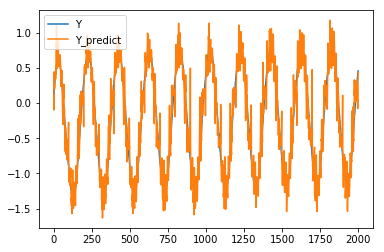

In [7]:
#KNN
knn = KNeighborsRegressor()
evaluate(knn,1,66,isNormalized = 0)
test_one_csv(knn, data_id, isNormalized = 0)

csv1---csv65
len_all_data = 127942
len_X_train = 95956
len_X_test = 31986
loss = 997.779239736
score = 0.712650237492
time cost = 0.24712555605140096 s
len_all_data = 2000
loss = 175.24448398


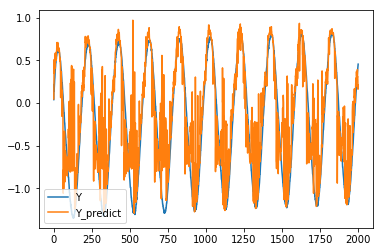

In [8]:
#KNN By Time
knn2 = KNeighborsRegressor()
evaluate_by_time(knn2,1,66,isNormalized = 0)
test_one_by_time(knn2, data_id, isNormalized = 0)

csv1---csv65
len_all_data = 127942
len_X_train = 95956
len_X_test = 31986
loss = 282.054477914
score = 0.918443571121
time cost = 545.4762642262281 s
len_all_data = 2000
loss = 37.6336449443


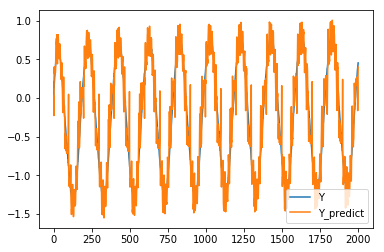

In [9]:
#支持向量机回归
svr1 = SVR(kernel='rbf')
evaluate(svr1, 1, 66, isNormalized = 0)
test_one_csv(svr1, data_id, isNormalized = 0)

csv1---csv65
len_all_data = 127942
len_X_train = 95956
len_X_test = 31986
loss = 851.261052837
score = 0.754668044203
time cost = 3446.792772118806 s
len_all_data = 1999
loss = 76.7917805858


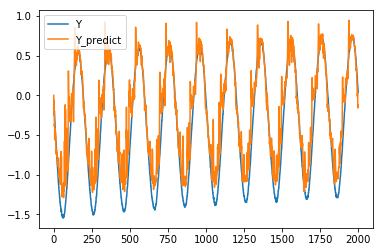

In [18]:
svr2 = SVR(kernel='rbf')
evaluate_by_time(svr2, 1, 66, isNormalized = 0)
test_one_by_time(svr2, data_id, isNormalized = 0)

csv1---csv65
len_all_data = 127942
len_X_train = 95956
len_X_test = 31986
loss = 260.83348607
score = 0.924868577653
time cost = 5.502804633369124 s
len_all_data = 1999
loss = 42.9292038674


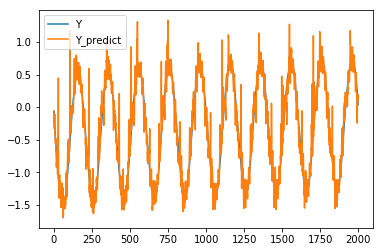

In [16]:
#随机森林
rfr = RandomForestRegressor(n_estimators=30)
evaluate(rfr,1,66,isNormalized = 0)
test_one_csv(rfr, data_id, isNormalized = 0)

csv1---csv65
len_all_data = 127942
len_X_train = 95956
len_X_test = 31986
loss = 161.651006753
score = 0.95392049475
time cost = 8.364654364197122 s
len_all_data = 1999
loss = 24.2007417156


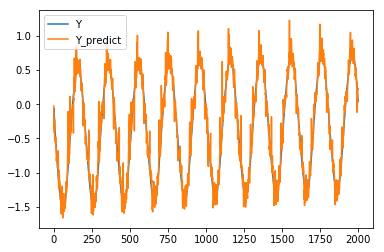

In [17]:
rfr2 = RandomForestRegressor(n_estimators=30)
evaluate_by_time(rfr2,1,66,isNormalized = 0)
test_one_by_time(rfr2, data_id, isNormalized = 0)

csv1---csv65
len_all_data = 127942
len_X_train = 95956
len_X_test = 31986
loss = 1025.04012447
score = 0.706202002501
time cost = 8.933525818236376 s
len_all_data = 1999
loss = 123.851053118


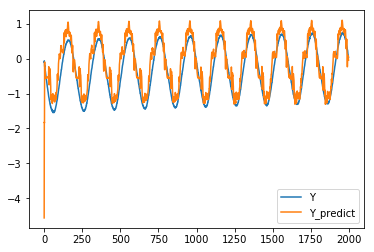

In [20]:
#神经网络回归
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor()
evaluate(mlpr, 1, 66, isNormalized = 0)
test_one_csv(mlpr, data_id, isNormalized = 0)

csv1---csv65
len_all_data = 127942
len_X_train = 95956
len_X_test = 31986
loss = 1982.09762954
score = 0.427004223697
time cost = 3.1902436486525403 s
len_all_data = 1999
loss = 488.191304525


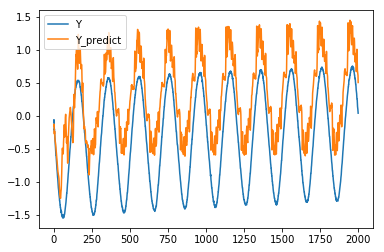

In [22]:
mlpr2 = MLPRegressor()
evaluate_by_time(mlpr2, 1, 66, isNormalized = 0)
test_one_by_time(mlpr2, data_id, isNormalized = 0)

G:\install\anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, input_dim=2, kernel_initializer="uniform")`
  


len_all_data = 127942
95956/95956 [==============================] - 0s 2us/step
cost = 0.309001172725
len_all_data = 1999
loss = [ 454.92108742  438.88164048  454.92108742 ...,  406.79418305  410.19995
  412.93812879]


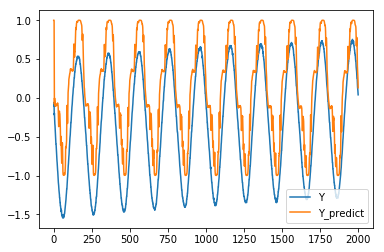

In [29]:
import sys
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, GRU, Dropout, SimpleRNN
#随机梯度下降
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(100, init='uniform', input_dim=2))
model.add(Activation("tanh"))
model.add(Dense(50))
model.add(Activation("tanh"))
model.add(Dense(1))
model.add(Activation("tanh"))
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))

Xk = create_data(1, 66)
#数据归一化处理,线性归一化
# Xk = (Xk - np.amin(Xk, axis=0))/(np.amax(Xk, axis=0)-np.amin(Xk, axis=0))
X_train, X_test, y_train, y_test = train_test_split(Xk[:,[1,3]],Xk[:,2], test_size=0.25)

model.fit(X_train, y_train, batch_size=1000, epochs=3, shuffle=True,verbose=0,validation_split=0.2)
cost = model.evaluate(X_train,y_train,batch_size=1000)
print('cost =',cost)
X_one = create_data(data_id,data_id+1)
# X_one = (X_one - np.amin(X_one, axis=0))/(np.amax(X_one, axis=0)-np.amin(X_one, axis=0))
# X_one = create_data(data_id,data_id+1)
y_one = model.predict(X_one[:,[1,3]],batch_size=100)
loss_one = 0.5*sum((y_one - X_one[:,2])**2)
print('loss =',loss_one)
plt.plot(X_one[:,0],X_one[:,2],label='Y')
plt.plot(X_one[:,0],y_one,label='Y_predict')
plt.legend()

In [ ]:
"""
rnn = Sequential()
rnn.add(SimpleRNN(100, input_shape=(10, 2, 100), activation='sigmoid', return_sequences=True))
rnn.add(Dense(100))
rnn.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

Xr = create_data(1, 2)
#数据归一化处理,线性归一化
# Xk = (Xk - np.amin(Xk, axis=0))/(np.amax(Xk, axis=0)-np.amin(Xk, axis=0))
# Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr[:,[1,3]],Xr[:,2], test_size=0.25)
rnn.fit(Xr[:,3].reshape(1,1,-1), Xr[:,2].reshape(1,1,-1), batch_size=1, epochs=1000, shuffle=True,verbose=2,validation_split=0.2)
# cost = rnn.evaluate(Xr_train,yr_train,batch_size=1000)
# print('cost =',cost)
Xr_one = create_data(data_id,data_id+1)
# X_one = (X_one - np.amin(X_one, axis=0))/(np.amax(X_one, axis=0)-np.amin(X_one, axis=0))
# X_one = create_data(data_id,data_id+1)
yr_one = rnn.predict(Xr_one[:,3],batch_size=1)
print(type(yr_one))
loss_one = 0.5*sum((yr_one - Xr_one[:,2])**2)
print('loss =',loss_one)
plt.plot(Xr_one[:,0],Xr_one[:,2],label='Y')
plt.plot(Xr_one[:,0],yr_one,label='Y_predict')
plt.legend()
"""

